# Load all required libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns

C:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Read the raw data

In [2]:
df = pd.read_table("human_data.txt")

In [3]:
df.shape

(4380, 2)

In [4]:
df.head(2)

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4


## Check teh counts of various classes

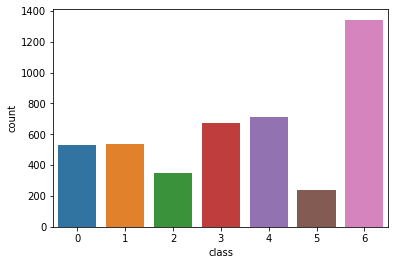

In [5]:
sns.countplot(df["class"])

## read more: why sequence of 6 characters are required for better result:
https://bioinfologics.github.io/post/2018/09/17/k-mer-counting-part-i-introduction/

### create chunkof 6-characters

In [6]:
# breaking the sequence into 6-6 chunks
def convertTosent(text):
    text = text.lower()
    tmp = [text[i:i+6] for i in range(len(text)+1)]
    sent = " ".join(tmp)
    return(sent)
# print(convertTosent("ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA"))

#### usign lambda function, transform the sequence column

In [7]:
lam = lambda x:convertTosent(x)

In [8]:
df.sequence = df.sequence.apply(convertTosent)

In [9]:
# df.sequence

In [10]:
df.sequence[0]

'atgccc tgcccc gcccca ccccaa cccaac ccaact caacta aactaa actaaa ctaaat taaata aaatac aatact atacta tactac actacc ctaccg taccgt accgta ccgtat cgtatg gtatgg tatggc atggcc tggccc ggccca gcccac cccacc ccacca caccat accata ccataa cataat ataatt taatta aattac attacc ttaccc tacccc accccc ccccca ccccat cccata ccatac catact atactc tactcc actcct ctcctt tcctta ccttac cttaca ttacac tacact acacta cactat actatt ctattc tattcc attcct ttcctc tcctca cctcat ctcatc tcatca catcac atcacc tcaccc caccca acccaa cccaac ccaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaata aaatat aatatt atatta tattaa attaaa ttaaac taaaca aaacac aacaca acacaa cacaaa acaaac caaact aaacta aactac actacc ctacca taccac accacc ccacct caccta acctac cctacc ctacct tacctc acctcc cctccc ctccct tccctc ccctca cctcac ctcacc tcacca caccaa accaaa ccaaag caaagc aaagcc aagccc agccca gcccat cccata ccataa cataaa ataaaa taaaaa aaaaat aaaata aaataa aataaa ataaaa taaaaa aaaaaa aaaaat aaaatt aaatta aattat attata ttataa tataac ataaca taacaa aacaaa acaaa

In [11]:
df.head(2)

,sequence,class
0,atgccc tgcccc gcccca ccccaa cccaac ccaact caac...,4
1,atgaac tgaacg gaacga aacgaa acgaaa cgaaaa gaaa...,4


## Create BOW

In [12]:
cv = CountVectorizer(ngram_range=(4,4))

## Train & Test split, 80%-20%

In [13]:
X_train,X_test,y_train,y_test = train_test_split(df.sequence,df["class"],test_size=.2,random_state=6)

In [14]:
cv_train = cv.fit_transform(X_train)
cv_train

<3504x234752 sparse matrix of type '<class 'numpy.int64'>'
	with 4356152 stored elements in Compressed Sparse Row format>

In [15]:
# cv.get_feature_names()

In [16]:
cv_test = cv.transform(X_test)

## Train and Prediction

In [17]:
from sklearn.naive_bayes import MultinomialNB

In [18]:
nb = MultinomialNB()

In [19]:
nb.fit(cv_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [20]:
y_pred = nb.predict(cv_test)

## Accuracy of model

In [21]:
accuracy_score(y_test,y_pred)*100

97.94520547945206

In [22]:
confusion_matrix(y_test,y_pred)

array([[104,   0,   0,   0,   1,   1,   0],
       [  1, 122,   0,   2,   2,   0,   0],
       [  0,   0,  58,   0,   0,   0,   0],
       [  0,   1,   0, 133,   0,   0,   1],
       [  1,   0,   0,   0, 128,   0,   0],
       [  0,   0,   0,   0,   1,  34,   0],
       [  1,   0,   0,   2,   4,   0, 279]], dtype=int64)

## Visualize confusion matrix

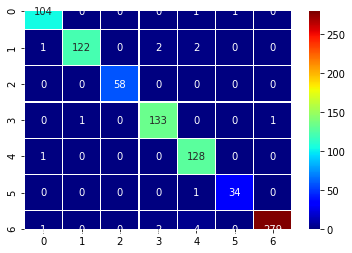

In [23]:
sns.heatmap(confusion_matrix(y_test,y_pred),cmap="jet",linewidths=.2,annot=True,fmt="d")

## Classification report

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       106
           1       0.99      0.96      0.98       127
           2       1.00      1.00      1.00        58
           3       0.97      0.99      0.98       135
           4       0.94      0.99      0.97       129
           5       0.97      0.97      0.97        35
           6       1.00      0.98      0.99       286

    accuracy                           0.98       876
   macro avg       0.98      0.98      0.98       876
weighted avg       0.98      0.98      0.98       876

